# PROJET DE PYTHON
# THEME : ANALYSE DE LA SATISFACTION DES UTILISATEURS DE LAPTOPS : CAS DES LAPTOPS DELL
# Auteurs:
* MECHIDE SERINE
* METHAFE KUITE SORELLE LOVELINE
* NKAMENI DANIEL
* POUANI EMAPI HORNELLA JOÊLLE

# ANALYSE DES DONNEES ET NATURAL LANGUAGE PROCESSING (NLP)

# INTRODUCTION: Contexte, Justification, Intéret, Objectifs et Méthodologie du projet

## Contexte et Justification du projet
DELL est l'un des plus gros fabricant d'outils informatique et particulièrement d'ordinateur au monde. Avec plus de 130 ordinateurs portable en vente sur le site de DELL France, DELL se classe aussi parmi les plus gros distributeurs de laptop en France. En 2017, DELL occupait déjà la 3ème place mondiale en terme de parts de marché et était en plaine évolution. (https://www.capital.fr/entreprises-marches/marche-des-pc-lenovo-hp-et-dell-continuent-de-gagner-des-parts-de-marche-1221554)

DELL propose des laptops pour des entreprises et des laptop pour des particuliers. Ce projet se focalise sur les laptops destinés aux particuliers en raison de la possibilités pour ces derniers de faire des commentaire sur la qualit et leurs satisfaction. Les catégories de laptops destinés aux particuliers en France sont Inspiron, XPS, Gaming et AlienWare (https://www.dell.com/fr-fr/shop/scc/sc/laptops)

## Objectifs du projet
Compte tenu du nombre croissant d'utilisateurs de laptop DELL, ce projet à trois principaux objectifs:

* Analyser les sentiments des utilisateurs de laptops DELL et de présenter un niveau d'appréciation global.
* Présenter les caractéristiques principaux des laptop DELL vendu en France.
* Analyser les facteurs qui influencent le niveau d'appréciation des clients.

## Intérêts du projet
Ce projet aura les intérêts suivants:

* Il présentera de façon facilement comprehensible et analysable les feedbacks des utilisateurs actuels de produits DELL pour chaque produit afin de mieux orienter les potentiels utilisateurs.
* Il permettra à DELL d'avoir une vu global des feedbacks de ses clients afin de mieux orienter sa politique commerciale et de mieux satisfaire ses clients actuels et futurs.

Comme précisé plus haut, dans le cadre de cette étude, nous nous intéressons uniquement aux laptop disponibles sur le site de DELL France. Notre objectif sera dans un premier temps de recueillir les données sur les informations relatives aux laptops pour particuliers et les commentaires postés pour chacun de ces laptops en utilisant la technique du webscraping. Puis, grâce aux méthodes NLP, nous ferons une analyse de sentiment sur les commentaires et enfin une étape de modélisation permettra de déterminer les sujets sur lesquels portent les avis des utilisateurs en général avec une approche Topic modeling (LDA).

## Méthodologie utilisée
Afin d'atteindre les objectifs précedemment énoncés, nous avons utilisé les méthodes suivantes:

* Web-Scraping : 
Il s'agit d'un processus d'extraction des données structurées sur le Web de manière automatisée. Cette opération nous permettra de constituer notre base de données. Les données du site de DELL France seront extraites pour nos différentes analyses.

* NLP (Natural Language Processing): 
Il s'agit d'une méthode à l’intersection du Machine Learning et de la linguistique dont le but est d'extraire des informations et une signification d’un contenu textuel. Dans notre projet, cette méthode sera utilisée pour effectuer de la detection des langues dans les commentaires, les wordclouds, l'analyse sentimentale ainsi que la detection des différentes aspects des laptops DELL les plus abordés dans les commentaires (topic modeling).

Les notebooks contenant les codes du scraping et ceux du traitement des données sont fournis en attaché de celui-ci. Vu la durée d'execution de ces codes, ils ont été exécutés séparement et les bases sont disponibles sur Git aux adresses suivantes:

* la base des informations sur chaque laptop (https://github.com/Serinem/Projet-Python-pour-le-data-scientist/blob/main/data_caracteristique.csv)
* la base des commentaires sur chaque laptop (https://github.com/Serinem/Projet-Python-pour-le-data-scientist/blob/main/Commentaires.csv)

# DESCRIPTION DES LAPTOPS DE DELL FRANCE

Dans Cette partie, il est question de faire une description des ordinateurs de DELL France. Pour cela, nous utilisons la base des information sur chaque laptop.

In [50]:
# Importation de la base des caractéristiques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
df = pd.read_csv("https://github.com/Serinem/Projet-Python-pour-le-data-scientist/blob/main/data_caracteristique.csv?raw=true",sep=",")


In [7]:
df.head()

,Unnamed: 0,prix en €,vitesse processeur en GHz,système d'exploitation,carte vidéo,mémoire en Go,capacité disque en Go,écran en pouces,batterie en wh
0,cn55524,699.30,4.5,Windows 11,nvidia,8.0,256.0,15.6,56.0
1,cng3027,829.18,4.5,Windows 10,nvidia,8.0,512.0,15.6,51.0
2,cn55522,999.30,4.5,Windows 11,nvidia,16.0,512.0,15.6,56.0
3,cn55517,999.30,4.5,Windows 11,nvidia,8.0,512.0,15.6,56.0
4,cn55403,999.30,4.2,Windows 11,nvidia,8.0,256.0,15.6,56.0


In [8]:
df.set_index("Unnamed: 0",inplace = True) #on met le num de commande en index 

In [10]:
df.describe()

,prix en €,vitesse processeur en GHz,mémoire en Go,capacité disque en Go,écran en pouces,batterie en wh
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1573.811460,4.354015,15.270073,642.394161,15.286861,38.934307
std,978.496613,0.772792,8.105466,312.389448,1.096171,36.152903
min,329.040000,1.800000,4.000000,128.000000,13.300000,1.000000
25%,829.040000,4.200000,8.000000,512.000000,14.000000,3.000000
50%,1249.290000,4.600000,16.000000,512.000000,15.600000,41.000000
75%,2049.220000,4.700000,16.000000,1000.000000,15.600000,86.000000
max,4397.980000,5.300000,32.000000,2000.000000,17.300000,87.000000


l'ordinateur moyen de DELL France coûte 1573,81 €, sa vitesse du processeur est de 4,35 GHz,la capacité de son disque dur est de 642 environ , une mémoire de d'environ 15 Go, un écran de 15 pouces et une batterie de 39 zh environ.

In [22]:
df[df['prix en €']== df['prix en €'].max()]

,Unnamed: 0,prix en €,vitesse processeur en GHz,système d'exploitation,carte vidéo,mémoire en Go,capacité disque en Go,écran en pouces,batterie en wh
53,nawx17r108,4397.98,5.0,Windows11,nvidia,32.0,1000.0,15.6,87.0


Le laptop le plus chère est de type aliewner. Il coûte 4397,98€, son processeur a une vitesse de 5 GHz, son système d'exploitation est windows 11, il a une carte vidéo de type nvidia.Il a une mémoire de 32 Go, un disque dur de capacité 1000 Go un écran de 15,6 pouces et une batterie de 87 wh.

In [23]:
df[df['prix en €']== df['prix en €'].min()]

,Unnamed: 0,prix en €,vitesse processeur en GHz,système d'exploitation,carte vidéo,mémoire en Go,capacité disque en Go,écran en pouces,batterie en wh
54,cn31006sc11,329.04,2.8,windows 11,intel,4.0,128.0,15.6,41.0
55,cn31003sc11,329.04,3.1,windows 11,intel,4.0,128.0,15.6,41.0


Les laptops les moins chèrs sont de type inspiron. Ils coûtent 329,04€, leur système d'exploitation est windows 11, ils ont une carte vidéo de type Intel. Ils ont une mémoire de 4 Go, un disque dur de capacité 128 Go un écran de 15,6 pouces et une batterie de 41 wh. Cependant, la vitesse du processeur de l'un est de 2,8 GHz et celle de l'autre est de 3.1 GHz.

Les graphiques ci-dessous, nous donnent plus d'informations sur la ventilation des caractéristiques des laptops de DELL France dans dans notre base.

In [26]:
def histogramme(df):
    fig, axes = plt.subplots(2, 3, figsize=(10,8))
    df.hist('prix en €', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
    axes[0,0].set_title('prix en €')
    df.hist('vitesse processeur en GHz', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
    axes[0,1].set_title('vitesse processeur en GHz')
    df.hist('mémoire en Go', bins=25, ax=axes[0,2], color='chartreuse', alpha=0.6)
    axes[0,2].set_title('mémoire en Go')
    df.hist('capacité disque en Go', bins=25, ax=axes[1,0], color='blue', alpha=0.6)
    axes[1,0].set_title('capacité disque en Go')
    df.hist('écran en pouces', bins=25, ax=axes[1,1], color='chartreuse', alpha=0.6)
    axes[1,1].set_title('écran en pouces')
    df.hist('batterie en wh', bins=25, ax=axes[1,2], color='lightcoral', alpha=0.6)
    axes[1,2].set_title('batterie en wh')
    plt.suptitle('Analyse des caractéristiques des laptops Dell France \n\n', fontsize=12, fontweight='bold');

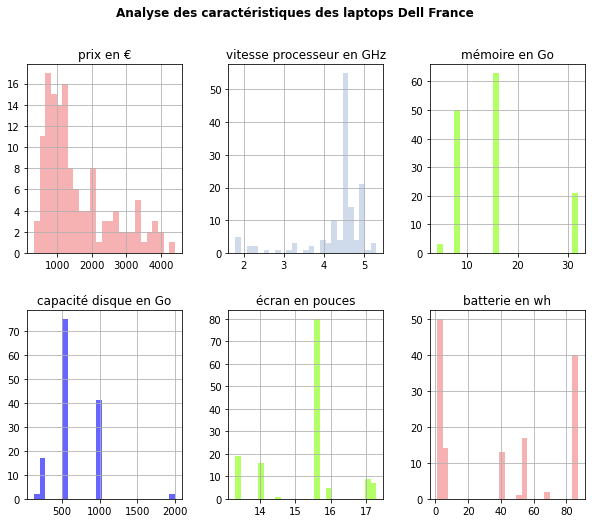

In [27]:
histogramme(df)

Il question ci-dessous d'avoir un aperçu des caractéristiques des variables catégorielles.

In [38]:
# Uniformisons la colonne système d'exploitation
df["système d'exploitation"].replace(["windows 11","Windows 11","Windows11"],"windows11",inplace=True)
df["système d'exploitation"].replace(["Windows 10","Windows10", "windows 10"],"windows10",inplace=True)

In [40]:
df["système d'exploitation"].value_counts()

windows11    117
windows10     20
Name: système d'exploitation, dtype: int64

In [41]:
df['carte vidéo'].value_counts()

nvidia    74
intel     49
amd       14
Name: carte vidéo, dtype: int64

Les ordinateurs ont en majorité comme système d'exploitation windows 11 et comme carte vidéo, les cartes graphiques NVIDIA.
Les graphiques ci-dessous, nous donne un aperçu visuelle de celà.

In [81]:
def visual1 (data): 
    sys=data["système d'exploitation"].value_counts(normalize=True).tolist()
    carte= data['carte vidéo'].value_counts(normalize=True).tolist()
    windows11 =sys[0]*100
    windows10 = sys[1]*100
    nvidia= carte[0]*100
    intel= carte[1]*100
    amd= carte[2]*100
    names1 = ['windows 11', 'windows 10']
    size1 = [windows11,windows10]
    names2 = ['carte nvidia', 'carte intel', 'carte amd']
    size2=[nvidia, intel, amd]
    fig,(axe1,axe2) = plt.subplots(1, 2,figsize=(20,20))
    axe1.pie(size1, labels=names1, colors=['lightcoral', 'lightsteelblue'],
            autopct='%.2f%%', pctdistance=0.8,
            wedgeprops={'linewidth':7, 'edgecolor':'white' })
    my_circle = plt.Circle((0,0), 0.6, color='white')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    fig.gca().add_artist(my_circle)
    axe1.set_title("système d'exploitation")
    axe2.pie(size2, labels=names2, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
            autopct='%.2f%%', pctdistance=0.8,
            wedgeprops={'linewidth':7, 'edgecolor':'white' })
    my_circle = plt.Circle((0,0), 0.6, color='white')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    fig.gca().add_artist(my_circle)
    axe2.set_title("carte graphique")
    plt.show()

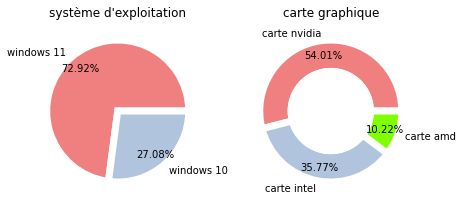

In [82]:
visual1(df)

# NATURAL LANGUAGE PROCESSING (NLP)

In [ ]:
#installation des packages nécéssaires
!pip install langdetect 
!pip install wordcloud
!pip install nltk
!pip install  gensim
!pip install vaderSentiment
!pip install textblob
!pip install vaderSentiment-fr
!pip install deep-translator
!pip install yellowbrick

<<<<<<< local


     |████████████████████████████████| 981 kB 1.9 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=89999590800e2dec0fd8e7c0f6f23315ba6f70c13a3bd56973479ecc14213a52
  Stored in directory: /home/jovyan/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
     |████████████████████████████████| 363 kB 1.8 MB/s            
     |████████████████████████████████| 1.5 MB 1.8 MB/s            
     |████████████████████████████████| 763 kB 54.4 MB/s            
     |████████████████████████████████| 24.0 MB 16.5 MB/s            
     |████████████████████████████████| 58 kB 15.5 MB/s            
     |████████████████████████████████| 125 kB 1.9 MB/s            
     |████████████████████████████████| 636 kB 1.9 MB/s            
     |████████████████████████████████| 187 kB 1.5 MB/s            
  Preparing metadata (setup.py) ... done


     |████████████████████████████████| 271 kB 1.9 MB/s            
     |████████████████████████████████| 14.9 MB 20.4 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


>>>>>>> remote


In [ ]:
#importation des packages nécessaires

import pandas as pd
import numpy as np
from langdetect import detect # pour detecter les langues
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from wordcloud import WordCloud # pour gerer les nuages de mots

from deep_translator import GoogleTranslator 



#stopword français
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 

# stopword anglais
import gensim 
from gensim.parsing.preprocessing import STOPWORDS 


#from gensim import corpora

from PIL import Image # pour personaliser la forme du wordcloud

# pour analyser les sentiments
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SenEN
analyzer = SenEN()

#pour les top_10 des mots les plus fréquents
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...


In [ ]:
#chargement de la base de donnée depuis Github
df=pd.read_csv("https://github.com/Serinem/Projet-Python-pour-le-data-scientist/blob/main/Commentaires.csv?raw=true",sep=";",encoding="latin_1")
df.head()


,Unnamed: 0,Comments
0,cn31512,"Tout neuf, des plus et des moins. Parmi les mo..."
1,cn31105,"Livraison ok, ordinateur super"
2,cn31105,Toujours parfait. Merci de cet envoi rapide
3,cn31105,bel ordinateur et correspond à nos attentes. t...
4,cn31105,PC de qualité et solide..


# Detection des langues

In [ ]:
def langue(text):
    try:
        return detect(text)
    except:
        return None

In [ ]:
df['langues']=df['Comments'].apply(langue)
print(f"il n'ya {len(df.langues.unique())} langues trouvées")
df['langues'].value_counts()

il n'ya 5 langues trouvées


fr    1822
en      30
ca      11
ro      10
af       6
Name: langues, dtype: int64

Comme on peut le constater , les commentaires sont rédigés dans 5 langues et la majorité est  en Français.
Nous pouvons mieux visualiser à l'aide du graphique ci-dessous.

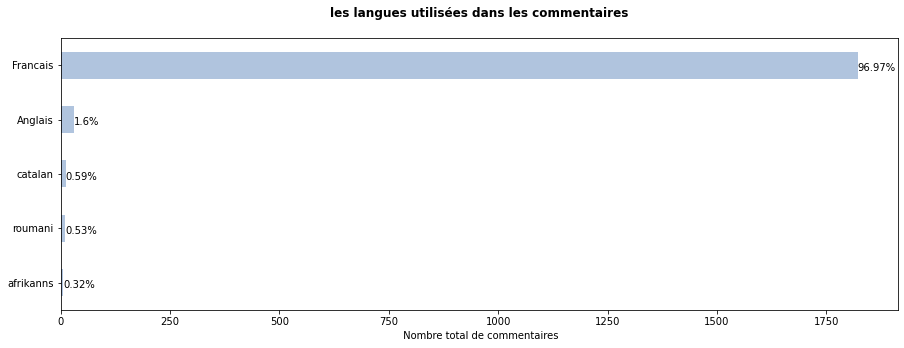

In [ ]:
ax=df['langues'].value_counts().sort_values(ascending=False).plot(kind='barh',figsize=(15,5),color='lightsteelblue')
ax.set_title("les langues utilisées dans les commentaires\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Nombre total de commentaires", fontsize=10)
ax.set_yticklabels(['Francais','Anglais','catalan', 'roumani','afrikanns'])
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
ax.invert_yaxis()

96,97 % des commentaires sont en français ce qui est tout à fait logique vu que nous travaillons sur les laptop DELL France. Les autres langues sont presques négligéables.

Après une analyse minutieuse, on s'est rendu compte qu'en réalité les commentaires sont rédigés seulement dans deux langues. les autres langues ne sont juste qu'une erreur de detection.
pour cette raison, dans la suite de notre travail nous allons regrouper les langues en deux catégories  Français et Anglais.

In [ ]:
df1=df[df['langues']=='ro']
df2=pd.concat([df1[df1['Unnamed: 0']=="cn51209sc11"],df1[df1['Unnamed: 0']=="cn51203sc"],df1[df1['Unnamed: 0']=="cn51210sc11"]],axis=0)
df3=df1.drop(df1.loc[df1["Unnamed: 0"].isin(["cn51209sc11","cn51203sc","cn51210sc11"]),].index)

df_english=pd.concat([df[df['langues']=='en'],df3],axis=0)
df_french=pd.concat([df[df['langues']=='fr'],df[df['langues']=='af'],df[df['langues']=='ca'],df[df['langues']=='es'],df2],axis=0)


# Visualisation des données avec les WordClouds.

Ici il s'agit de representer graphiquement les mots qui reviennent le plus dans les commentaires. Pour ce faire, nous allons commencer par définir les Stop-words : Il s'agit des mots qui ne nous seront pas utiles pour les analyses.

# Définition des Stop-words

Le package gensim nous a fourni les Stop-words anglais et les stop-words francais proviennent du package nltk. Ces derniers ont été enrichis par d'autres stop-words que nous avons défini.

In [ ]:
stop_word_en =set(STOPWORDS)
stop_word_fr = set(stopwords.words('french'))
stop_words_add_fr=['téléphone', 'farantieEt','PC','a', 'portable', 'logicielUne', 'une', 'reception','Livraison','internet','portables','respectés','contrôler','command','ordi','possibilité','moins','plus','cause','option','client','envoie','touchpad','option','parmi','seul','neuf','dirais','d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'résolus','esim','tres','voir','ok','gamme','fois', 'livraisons','Bref', 'reste','après','temps','première','connection','remboursement', 'bref','délais','soucis','souris','tout','versions','trop', 'mette','réception',  'affichage', 'recommande', 'commande', 'toujours', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme','service','marché','seule','rapport','haute','depuis','technique','arrivé','center','année','puis',"d'autres",'non','cet','plusieurs',"l'ordinateur",'envoi','ordinateur']
stop_words_add_en=['price','computer','options','laptop','e','battery','g','qwerty','destop','provides',"computer'",'plus','Finitions','keyboard','design','touch screen','particle','set','PC','pc','use','usb','product','dell','screen','port','purchase']
stop_word_en.update(stop_words_add_en)
stop_word_fr.update(stop_words_add_fr)


# Construction du WordCloud

In [ ]:
def plot_wordcloud(df, langue,stop_word):
    wordcloud=WordCloud(max_font_size=None, max_words=500, background_color="white",stopwords=stop_word, random_state=42, width=500, height=500).generate(str(df.values))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.title(langue + ' Comments\n', fontsize=25, fontweight='bold')
    plt.show()

#  WordCloud des commentaires en francais

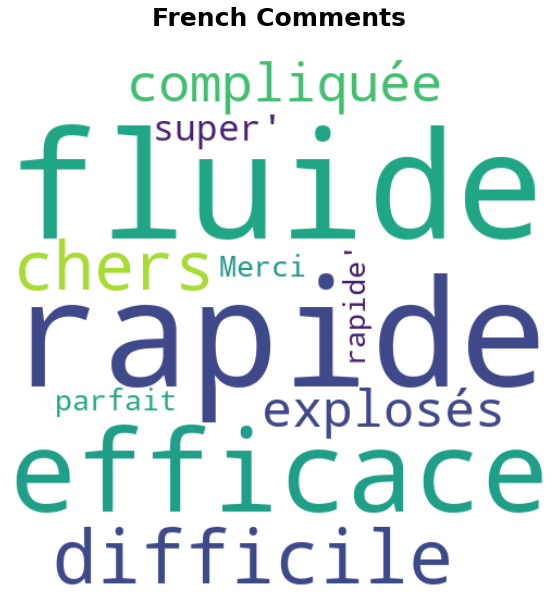

In [ ]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_french['Comments'], "French",stop_word_fr)
plt.show()

# WordCloud des commentaires en Anglais

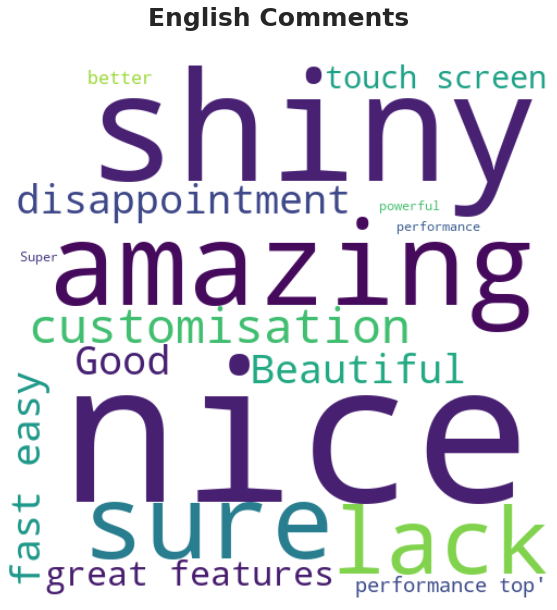

In [ ]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_english['Comments'], "English",stop_word_en)
plt.show()

# Analyse sentimentale des commentaires

L’analyse des sentiments consiste essentiellement à juger le sentiment qui se cache derrière un écrit.Cela consiste donc à prendre un morceau de texte, qu’il s’agisse d’une phrase ou d’un article complet, et à analyser l’émotion que l’auteur exprime. Dans notre analyse, nous allons calculer pour chaque commentaire, le score de sentiment positif, négatif ou neutre qu'il exprime. Nous allons par la suite classer chaque commentaire en fonction du sentiment positif, négatif ou neutre.

**Le score de sentiment** indique la probabilité de la nature d'un sentiment exprimé à travers une expression(commentaire)

La bibliothèque VADER renvoie 4 valeurs telles que :

**pos**: La probabilité que le sentiment soit positif

**neu**: La probabilité que le sentiment soit neutre

**neg**: La probabilité que le sentiment soit négatif

**compound**: Le score composé et qui prend des valeurs de -1 à 1

# Score  de sentiment pour les commentaires en Français

In [ ]:
df_french['negatif_feeling'] = df_french['Comments'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_french['neutral_feeling'] = df_french['Comments'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_french['positif_feeling'] = df_french['Comments'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_french['compound_feeling'] = df_french['Comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_french.head()

,Unnamed: 0,Comments,langues,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling
0,cn31512,"Tout neuf, des plus et des moins. Parmi les mo...",fr,0.028,0.972,0.000,-0.1280
1,cn31105,"Livraison ok, ordinateur super",fr,0.000,0.247,0.753,0.7269
2,cn31105,Toujours parfait. Merci de cet envoi rapide,fr,0.000,1.000,0.000,0.0000
3,cn31105,bel ordinateur et correspond à nos attentes. t...,fr,0.000,1.000,0.000,0.0000
4,cn31105,PC de qualité et solide..,fr,0.000,1.000,0.000,0.0000


#  Score de sentiment pour les commentaires en Anglais

In [ ]:
df_english['negatif_feeling'] = df_english['Comments'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_english['neutral_feeling'] = df_english['Comments'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_english['positif_feeling'] = df_english['Comments'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_english['compound_feeling'] = df_english['Comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_english.head()

,Unnamed: 0,Comments,langues,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling
721,cn93209sc,"fast, easy to set up, great features and shiny!",en,0.000,0.490,0.510,0.8070
761,cn93209sc,"It's an amazing laptop, really particle and ha...",en,0.000,0.611,0.389,0.8360
778,cn93209sc,Finitions performance top,en,0.000,0.526,0.474,0.2023
813,cn93209sc,The lack of customisation options is such a di...,en,0.384,0.616,0.000,-0.6808
864,cn93242sc11,"fast, easy to set up, great features and shiny!",en,0.000,0.490,0.510,0.8070


Dans la suite,nous ferons une concaténation des bases des commentaires/scores en francais et en englais pour former une base unique afin d'afficher l'histogramme des scores

In [ ]:
# scores  pour l'anglais et francais
base=pd.concat([df_french,df_english])

# Histogramme selon la nature du score

In [ ]:
def histogram(df):
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    df.hist('negatif_feeling', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
    axes[0,0].set_title('Negative Sentiment Score')
    df.hist('neutral_feeling', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
    axes[0,1].set_title('Neutral Sentiment Score')
    df.hist('positif_feeling', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
    axes[1,0].set_title('Positive Sentiment Score')
    df.hist('compound_feeling', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
    axes[1,1].set_title('Compound')
    fig.text(0.5, 0.04, 'Scores de sentiment',  fontweight='bold', ha='center')
    fig.text(0.04, 0.5, 'Nombre de commentaires', fontweight='bold', va='center', rotation='vertical')
    plt.suptitle('Analyse sentimentale des utilisateurs des laptops Dell France \n\n', fontsize=12, fontweight='bold');

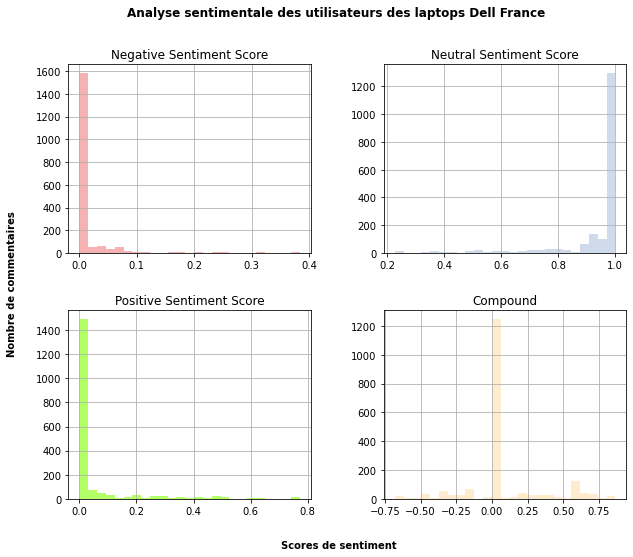

In [ ]:
histogram(base)

## ATTENTION!

On constate d'après la représentation graphique que les resultats obtenus ne concordent pas avec les faits. En effet la majorité des commentaires exprime selon nous un sentiment positif. Donc de façon naturel, on s'attendait à avoir  un graphique qui exprime mieux nos attentes.

# Dectection du problème

Le fichier de lexique "vader_lexicon" contient uniquement les mots en anglais et le score est prédéfinit en fonction  de ces mots. 
c'est ce qui biase le resultat car la methode Vader n'arrive pas à produire un bon resultat pour les commentaires exprimées en Français. 

# Resolution du problème

 Pour pallier à ce problème, nous avons jugez bon de traduire tous les commentaires en Anglais.

# Traduction des commentaires en Anglais

In [ ]:
%%time
data=df.rename({'Unnamed: 0':'N_Commande'},axis=1)
data['Comment']=base['Comments'].apply(lambda x:GoogleTranslator(source='auto', target='en').translate(x))
data

CPU times: user 53.7 s, sys: 2.36 s, total: 56.1 s
Wall time: 6min 9s


,N_Commande,Comments,langues,Comment
0,cn31512,"Tout neuf, des plus et des moins. Parmi les mo...",fr,"Brand new, pluses and minuses. Among the minus..."
1,cn31105,"Livraison ok, ordinateur super",fr,"Delivery ok, computer great"
2,cn31105,Toujours parfait. Merci de cet envoi rapide,fr,Always perfect. Thank you for this quick shipment
3,cn31105,bel ordinateur et correspond à nos attentes. t...,fr,beautiful computer and meets our expectations....
4,cn31105,PC de qualité et solide..,fr,Quality and solid PC.
...,...,...,...,...
1874,nawx17r108,Je lai commande une première fois il est arri...,fr,I ordered it the first time it arrived faulty ...
1875,nawx17r108,Les températures sont très correctes pour un p...,fr,The temperatures are very correct for such a p...
1876,nawx17r108,"haute gamme, tres puissant, le plus puissant d...",fr,"high range, very powerful, the most powerful i..."
1877,nawx17r108,Je lai commande une première fois il est arri...,fr,I ordered it the first time it arrived faulty ...


<<<<<<< local <modified: >


CPU times: user 50.6 s, sys: 2.66 s, total: 53.3 s
Wall time: 5min 27s


CPU times: user 54.2 s, sys: 2.44 s, total: 56.7 s
Wall time: 9min 17s


>>>>>>> remote <modified: >


# Score de sentiment

Ici nous allons recalculer le score de sentiment avec la base traduite en Anglais

In [197]:
# Exemple
analyzer.polarity_scores("i need you")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
data['negatif_feeling'] = data['Comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data['neutral_feeling'] = data['Comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data['positif_feeling'] = data['Comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data['compound_feeling'] = data['Comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
data.head()

,N_Commande,Comments,langues,Comment,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling
0,cn31512,"Tout neuf, des plus et des moins. Parmi les mo...",fr,"Brand new, pluses and minuses. Among the minus...",0.127,0.873,0.000,-0.7394
1,cn31105,"Livraison ok, ordinateur super",fr,"Delivery ok, computer great",0.000,0.241,0.759,0.7430
2,cn31105,Toujours parfait. Merci de cet envoi rapide,fr,Always perfect. Thank you for this quick shipment,0.000,0.492,0.508,0.7351
3,cn31105,bel ordinateur et correspond à nos attentes. t...,fr,beautiful computer and meets our expectations....,0.000,0.719,0.281,0.5994
4,cn31105,PC de qualité et solide..,fr,Quality and solid PC.,0.000,0.652,0.348,0.1531


# Histogramme selon la nature de score

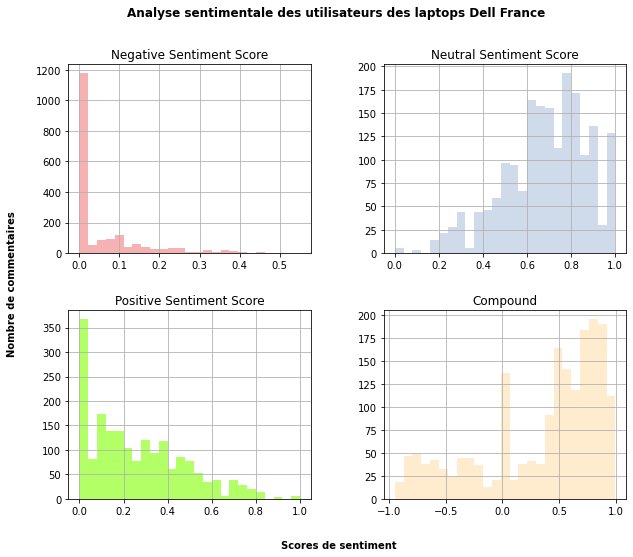

In [ ]:
histogram(data)

Le resultat graphique montre que près de 1200 commentaires ont un score négatif nul ; un peu plus de 125 commentaires ont un score neutre égal à 1, moins  de 380 commentaires ont un score positif nul.
Egalement moins de 150 commentaires ont un score composé nul et près de 200 commentaires ont un score composé proche de 1.

**REMARQUE**  
Cette interprétation graphique ne nous permet pas de dire exactement quelle est la nature de sentiment qui domine.
Pour ce faire, nous allons utiliser la norme de classification des scores de sentiment composé pour  mettre la lumière sur ce point.  
En effet, selon le lien suivant https://fr.acervolima.com/python-analyse-des-sentiments-a-laide-de-vader/
Les valeurs seuils typiques sont :
lorsque le **score composé>=0,05** la nature du sentiment est **positive**, elle est  **neutre** lorsque **le score composé est entre -0,05 et 0,05** et **négative** lorsque **le score composé<=-0,05**

# Classification des commentaires selon la norme çi dessus

In [ ]:
def verification(number):
    if number<-0.05 :
        return 'négatif'
    elif number<=0.05 :
        return 'neutre'
    else:
        return 'positif'

In [ ]:
data['Nature_feeling'] = data['compound_feeling'].apply(lambda x:verification(x))
data.head(10)

,N_Commande,Comments,langues,Comment,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling,Nature_feeling
0,cn31512,"Tout neuf, des plus et des moins. Parmi les mo...",fr,"Brand new, pluses and minuses. Among the minus...",0.127,0.873,0.000,-0.7394,négatif
1,cn31105,"Livraison ok, ordinateur super",fr,"Delivery ok, computer great",0.000,0.241,0.759,0.7430,positif
2,cn31105,Toujours parfait. Merci de cet envoi rapide,fr,Always perfect. Thank you for this quick shipment,0.000,0.492,0.508,0.7351,positif
3,cn31105,bel ordinateur et correspond à nos attentes. t...,fr,beautiful computer and meets our expectations....,0.000,0.719,0.281,0.5994,positif
4,cn31105,PC de qualité et solide..,fr,Quality and solid PC.,0.000,0.652,0.348,0.1531,positif
5,cn31105,"Ordi pour du bureau, vraiment. Même un petit j...",fr,"Computer for the office, really. Even a small ...",0.000,0.829,0.171,0.7506,positif
6,cn31105,Qualité de limage très médiocre pour un ordin...,fr,Very poor picture quality for a computer of th...,0.361,0.639,0.000,-0.7774,négatif
7,cn31105,Ordinateur de très bonne qualité. Cependant le...,fr,Very good quality computer. However the big we...,0.072,0.848,0.080,0.0754,positif
8,cn31105,Machine fragile. La régulation de température ...,fr,Fragile machine. The temperature control does ...,0.185,0.815,0.000,-0.2057,négatif
9,cn31105,PAS SATISFAIT DU TOUT DE CET ACHAT ! Jai Ache...,fr,NOT SATISFIED AT ALL WITH THIS PURCHASE! I bou...,0.230,0.770,0.000,-0.9471,négatif


In [ ]:
#data.loc[(data['compound_feeling']>=-0.05)&(data['compound_feeling']<=0.05),].head()

<<<<<<< local <modified: text/html, text/plain>


,N_Commande,Comments,langues,Comment,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling,Nature_feeling
43,cn51107sc11,"Bonjour, Afficher l'avis complet Cette action...",fr,"Bonjour,… View full review This action will op...",0.0,1.0,0.0,0.0,neutre
52,cn51106sc11,"Bonjour, Afficher l'avis complet Cette action...",fr,"Bonjour,… View full review This action will op...",0.0,1.0,0.0,0.0,neutre
83,cn51525sc11,Portable répondant à mes besoins,fr,Laptop meeting my needs,0.0,1.0,0.0,0.0,neutre
87,cn51525sc11,Impeccable.................,ca,Impeccable.................,0.0,1.0,0.0,0.0,neutre
110,cn51525sc11,Produits compacts et léger,fr,Compact and lightweight products,0.0,1.0,0.0,0.0,neutre


>>>>>>> remote <removed>


In [ ]:
#axe.patches
#axe.patches[0].get_width()
#axe.patches[0].get_y()

# Statistiques

In [ ]:
data['Nature_feeling'].value_counts()

positif    1336
négatif     404
neutre      139
Name: Nature_feeling, dtype: int64

In [201]:
data['Nature_feeling'].describe()

count        1879
unique          3
top       positif
freq         1336
Name: Nature_feeling, dtype: object

On peut donc remarquer que les resultats sont cohérents avec ce que nous constatons en lisant les commentaires des utilisateurs.
Plus de 1335 commentaires sur 1879 sont positifs ce qui voudrait dire qu'en moyenne les utilisateurs sont sastifaits.

# Representation graphique

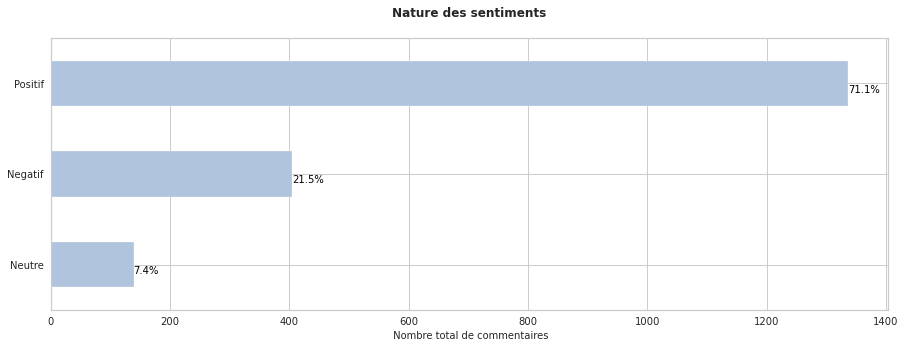

In [ ]:
axe=data['Nature_feeling'].value_counts().sort_values(ascending=False).plot(kind='barh',figsize=(15,5),color='lightsteelblue')
axe.set_title("Nature des sentiments\n", 
             fontsize=12, fontweight='bold')
axe.set_xlabel(" Nombre total de commentaires", fontsize=10)
axe.set_yticklabels(['Positif','Negatif','Neutre'])
totals = []
for i in axe.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in axe.patches:
    axe.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
axe.invert_yaxis()

In [ ]:
def Etat(df): 
    prop=data["Nature_feeling"].value_counts(normalize=True).tolist()
    neg =prop[2]*100
    mid = prop[1]*100
    pos = prop[0]*100
    names = ['commentaires neutres', 'commentaires négatifs','commentaires positifs']
    size = [neg, mid, pos]
    plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
            autopct='%.2f%%', pctdistance=0.8,
            wedgeprops={'linewidth':7, 'edgecolor':'white' })
    my_circle = plt.Circle((0,0), 0.6, color='white')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    fig.gca().add_artist(my_circle)
    plt.show()

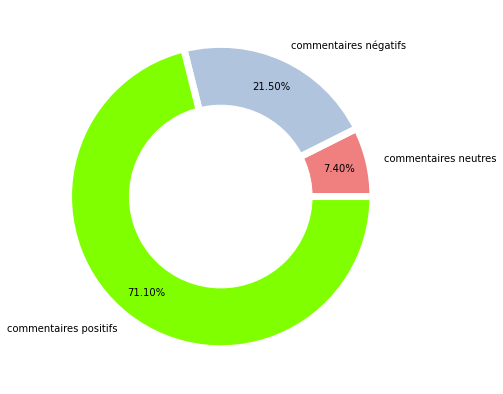

In [136]:
Etat(data)

Nous pouvons constater que plus de 71% des commentaires sont positifs et seulement 21.5% des commentaires sont négatifs.

# TOP 10 DES MOTS LES PLUS FREQUENTS DANS LES COMMENTAIRES 

In [224]:
def top_10(data,stop_word,com):  
    vectorizer = CountVectorizer(stop_words = frozenset(stop_word))
    docs = vectorizer.fit_transform(data)
    features = vectorizer.get_feature_names()
    set_palette('pastel')
    plt.title('Top 10 des mots les plus fréquents dans la liste des commentaires ' + com + '\n', fontweight='bold')
    visualizer = FreqDistVisualizer(features=features, n=10)
    visualizer.fit(docs)
    visualizer.poof;


**Remarque**: Frozenset(collection figée):c'est un Types d'objets itérables , une Collection désordonnée immuable d'éléments uniques
Vectorizer.fit_transform est utilisé pour créer du vocabulaire à partir du jeu de données d’entraînement.

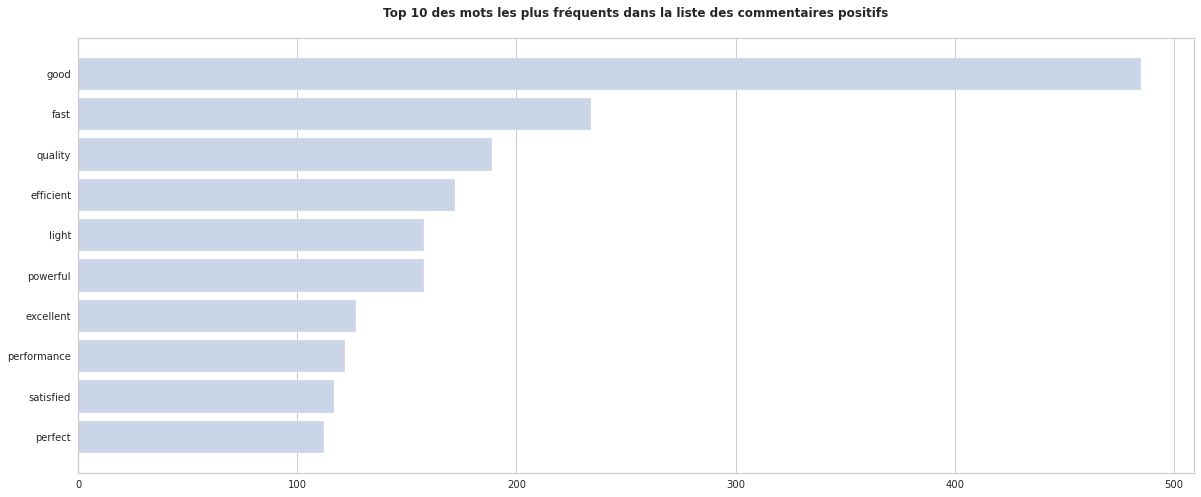

In [225]:
plt.figure(figsize=(20,8))
top_10(data[data.Nature_feeling=="positif" ].Comment,stop_word_en,"positifs")

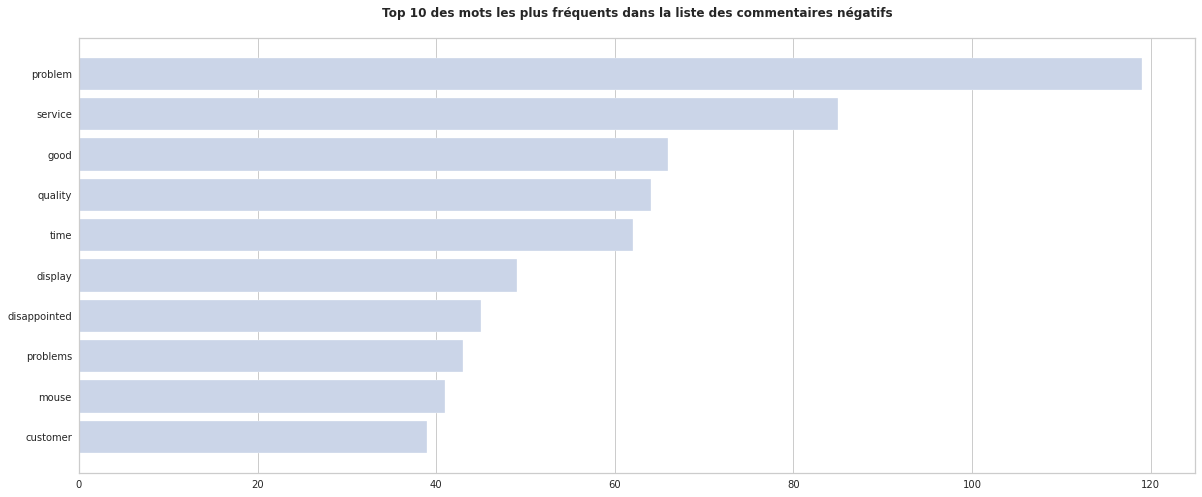

In [226]:
plt.figure(figsize=(20,8))
top_10(data[data.Nature_feeling=="négatif" ].Comment,stop_word_en,"négatifs")

Les deux graphiques ci-dessus montrent que les mots positifs les plus fréquents dans les commentaires ont un lien avec la performance, la rapidité, l'efficacité et la puissance des laptops DELL. Les clients pas satisfait on par contre tendance à critiquer le delai de livraison, l'écran et la souris. Ils utilisent des mots tels que deçu, problème, mauvais pour exprimer leurs sentiments

# TOPIC MODELING (LDA)
Dans cette partie, nous allons analyser les sujets les plus récurrents (vitesse, battérie, capacité, etc) sur les avis des utilisateurs de Laptops DELL grâce au modèle LDA (Latent Dirichlet Allocation).

Nous allons appliquer ce modèle aux commentaires positifs puis aux commentaire négatif. Le topic modeling sera appliquée aux commentaires traduits en Anglais

In [42]:
pos_comments = data[(data.Nature_feeling=="positif")].Comment.tolist()
neg_comments = data[(data.Nature_feeling=="négatif")].Comment.tolist()

Nous allons à prsent ajouter quelques mots dans les stopwords pour donner du sens aux topics. Il est important de préciser que cette partie a néccessité une sorte de qualibration manuel à l'aide du nuage de mot car chaque fois qu'un mot pas très util apparaissait dans le nuage de mot, ce dernier était inclus dans la liste des stop words et par consequant exclus du modèle

In [70]:
# on utilise les stop_words anglais par défaut de nltk
stop_word_en = nltk.corpus.stopwords.words('english')

# Sur la base des observations fait dans le nuage de mots, on ajoute certains mots aux stop words
add_stop_words_en = ['13','xps','use','product','laptop','pc','computer','dell','good','s', 't', '2','us','also','would','and', 'the', 'was', 'in','very','I', 'to', 'a','us','if','all','One','then','because','does','is','this']
stop_word_en.extend(add_stop_words_en)

Nous allons à présent écrire les fonctions qui serviront au topic modeling

In [71]:
langue = ['english']

# cette fonction permet de nettoyer les texte 
def cleaning_words(text,langue,stop_words): 
    text = text.lower() # on change les caractères en minuscule
    words = word_tokenize(text, language=langue) #  tokenization pour découper le texte en mots
    ws = [word for word in words if word.isalnum()] 
    new_ws = [w for w in ws if w not in stop_words] # on enlève les stopwords
    return new_ws

# fonction qui renvoie le topic avec ldamodel
from nltk.tokenize import word_tokenize
from gensim import corpora

def LDA_model(list_com,nb_topic,nb_words,langue,stop_words):
    corpus = []
    for i in range(len(list_com)):
        corpus.append(cleaning_words(list_com[i],langue,stop_words))
    dictionary = corpora.Dictionary(corpus) # on crée notre corpus avec les mots nettoyés
    bow = [dictionary.doc2bow(text) for text in corpus]
    # on précise que le résultats de cette fonction peut changer après chaque éxécution 
    # donc l'option 'random_state = ' permet de le fixer 
    ldamodel = gensim.models.ldamodel.LdaModel(bow, num_topics=nb_topic, id2word=dictionary, passes=15,random_state=100)
    topics = ldamodel.print_topics(num_words=nb_words)
    for topic in topics:
        print(topic)

Résultats du Topic Modeling sur commentaire positifs

In [72]:
LDA_model(pos_comments,5,5,langue[0],stop_word_en)

(0, '0.015*"keyboard" + 0.014*"screen" + 0.011*"performance" + 0.011*"super" + 0.009*"fast"')
(1, '0.021*"screen" + 0.014*"quality" + 0.013*"great" + 0.011*"fast" + 0.011*"well"')
(2, '0.018*"quality" + 0.018*"open" + 0.016*"purchase" + 0.015*"full" + 0.014*"dialog"')
(3, '0.029*"efficient" + 0.026*"fast" + 0.024*"light" + 0.023*"excellent" + 0.019*"powerful"')
(4, '0.014*"screen" + 0.012*"support" + 0.010*"purchase" + 0.009*"best" + 0.009*"responsive"')


Résultats du Topic Modeling sur commentaire négatifs

In [73]:
LDA_model(neg_comments,5,5,langue[0],stop_word_en)

(0, '0.026*"service" + 0.014*"quality" + 0.014*"time" + 0.014*"problems" + 0.011*"price"')
(1, '0.031*"problem" + 0.019*"3" + 0.015*"purchase" + 0.014*"days" + 0.012*"week"')
(2, '0.018*"usb" + 0.016*"screen" + 0.012*"processor" + 0.010*"already" + 0.009*"port"')
(3, '0.030*"problem" + 0.016*"work" + 0.014*"screen" + 0.012*"quality" + 0.012*"sound"')
(4, '0.027*"usb" + 0.026*"screen" + 0.023*"port" + 0.021*"battery" + 0.014*"1"')


**Interprétation**

Les résultats sur les commentaires positifs traduisent un intérêt particulier des utilisateurs sur la rapidité, la performance, le clavier, l'écran et le poids. On a tendence à conclure que les sujets les plus abordés par les clients dans les commentaires sont la bonne performance des laptops DELL, la bonne qualité de l'écran, la facilité d'achat et la réactivité du service après vente.

Une analyse similaire des commentaires négatifs montre que les utilisateurs mécontent critiquent le prix, le délai de livraison, les écrans aussi dans certains cas, la qualité du son et le fait qu'il n'y ait pas beaucoup de ports USB dans certains cas.

# ANALYSES COMPLEMENTAIRES: ANALYSE DE LA CORRELATION ENTRE LE PRIX DES LAPTOPS DELL ET LES SENTIMENT DES CLIENTS

Pour réaliser ces analyse, il nous faut une base contenant les prix des machines, les commntaires et certaines autres caractéristiques. Cette base s'obtient en deux étapes:

* Calcul du score de sentiment composé moyen pour chaque ordinateur
* Fusion de la base contenant les scores agrégé avec la base des caractéristiques

## Constructions de la Nouvelle base

In [61]:
#Agrégation des scores 
# On se limite aux éléments de la base qui nous interessent
data1 = data[["N_Commande","compound_feeling"]]
data1 = data1.groupby("N_Commande").agg("mean")
data1

# Fusion avec la base des caractéristiques

# Importation de la base des caractéristiques
data2 = pd.read_csv("https://github.com/Serinem/Projet-Python-pour-le-data-scientist/blob/main/data_caracteristique.csv?raw=true",sep=",")

# Fusion
data2 = data2.set_index("Unnamed: 0")

data3 = pd.concat([data1,data2], axis=1).dropna()

data3

,compound_feeling,prix en €,vitesse processeur en GHz,système d'exploitation,carte vidéo,mémoire en Go,capacité disque en Go,écran en pouces,batterie en wh
cn31103,0.125156,679.03,4.2,windows 11,intel,8.0,256.0,15.6,41.0
cn31105,0.125156,499.03,4.1,windows 11,intel,8.0,256.0,15.6,41.0
cn31110sc11,0.125156,569.04,4.2,windows 11,intel,8.0,256.0,15.6,41.0
cn31116,0.125156,849.04,4.7,windows 11,intel,16.0,512.0,15.6,41.0
cn31118sc11,0.125156,549.04,4.1,windows 11,intel,8.0,512.0,15.6,41.0
...,...,...,...,...,...,...,...,...,...
nawx17r104,-0.146517,3347.98,4.6,Windows11,nvidia,32.0,1000.0,17.3,87.0
nawx17r105,-0.146517,3397.99,4.6,Windows11,nvidia,16.0,1000.0,17.3,87.0
nawx17r106,-0.146517,4047.99,4.6,Windows11,nvidia,32.0,1000.0,15.6,87.0
nawx17r107,-0.146517,3897.99,5.0,Windows11,nvidia,16.0,1000.0,17.3,87.0


## Analyses complémentaires

Nous allons dans cette partie vérifier si les avis des clients DELL sont corrélés aux prix des machines ou pas. Commençons par visualiser ces deux variables sur un nuage de points.

<AxesSubplot:xlabel='prix en €', ylabel='compound_feeling'>

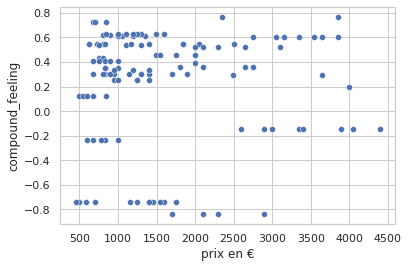

In [76]:
# Nuage de points avec seaborn

import seaborn
seaborn.set(style='whitegrid')
 
seaborn.scatterplot(x="prix en €",
                    y="compound_feeling",
                    data=data3)

Ce graphique montre qu'il n'y a à priori pas de corrélation linéaire entre les avis des clients et les prix des machines. Nous allons calculer le coefficient de corrélation et effectuer un test d'indépendance entre ces deux variables pour confirmer ou infirmer cela.

In [79]:
import numpy as np
from scipy.stats import stats

test = stats.pearsonr(data3["compound_feeling"], data3["prix en €"])
print("Coefficient de corrélation de pearson = ",test[0])
print("")
print("Test d'indépendance de pearson (H0 : L'avis d'un client est indépendant du prix du laptop)")
print("")
print("P-valeur = ",test[1])

Coefficient de corrélation de pearson =  0.02467372393184313

Test d'indépendance de pearson (H0 : L'avis d'un client est indépendant du prix du laptop)

P-valeur =  0.7873405185378639


**Interprétation**

Nous avons un coefficient de corrélation proche de 0 et une p-valeur très élevé. Nous pouvons donc conclure au seuil de 10% que les avis des clients de DELL ne sont pas corrélés aux prix des laptops.

Ceci est une bonne chose car sous-entend que les avis des clients dépendent réelement des caractéristiques intrinsèques des laptops ce qui renforce les résultats que nous avons obtenu plus haut avec le Topic Modeling. En effet, si les avis étaient corrélés aux prix, on auraient tendance à croire que les resultats du Topic Modeling contiennent un certain biais, ce qui n'est heureusement pas le cas ici.